# Wavelet:

In [4]:
#Importing the libraries to watch the 'fits' image and get the data array
import astropy
#import plotly.graph_objects as go
from astropy.io import fits
from sklearn.metrics import mean_squared_error
#Importing a library that is useful to read the original file
import pandas as pd
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
#Importing a visual library with some illustrative set up
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
from matplotlib import cm
import numpy as np
import math 
import pywt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
plt.rcParams["axes.grid"] = False

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256))) 
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

In [11]:
data=pd.read_csv('/Users/pierohmd/Desktop/day.csv',sep=';',header=None)

In [12]:
data=data.rename(columns={0:'Year',1:'Month',2:'Day',3:'Date',4:'Sunspot',5:'Std',6:'N',7:'isprov'})

In [13]:
data=data.drop(data[data['Sunspot']==-1].index)

In [14]:
data=data.drop(data[data.isprov==0].index)

In [15]:
data.head()

,Year,Month,Day,Date,Sunspot,Std,N,isprov
7,1818,1,8,1818.021,65,10.2,1,1
12,1818,1,13,1818.034,37,7.7,1,1
16,1818,1,17,1818.045,77,11.1,1,1
17,1818,1,18,1818.048,98,12.6,1,1
18,1818,1,19,1818.051,105,13.0,1,1


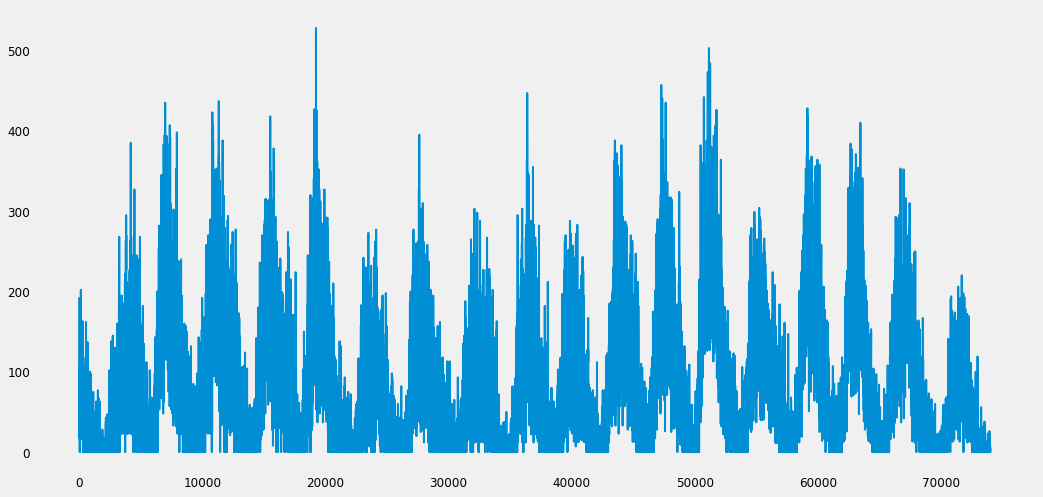

In [16]:

plt.plot(data.Sunspot)

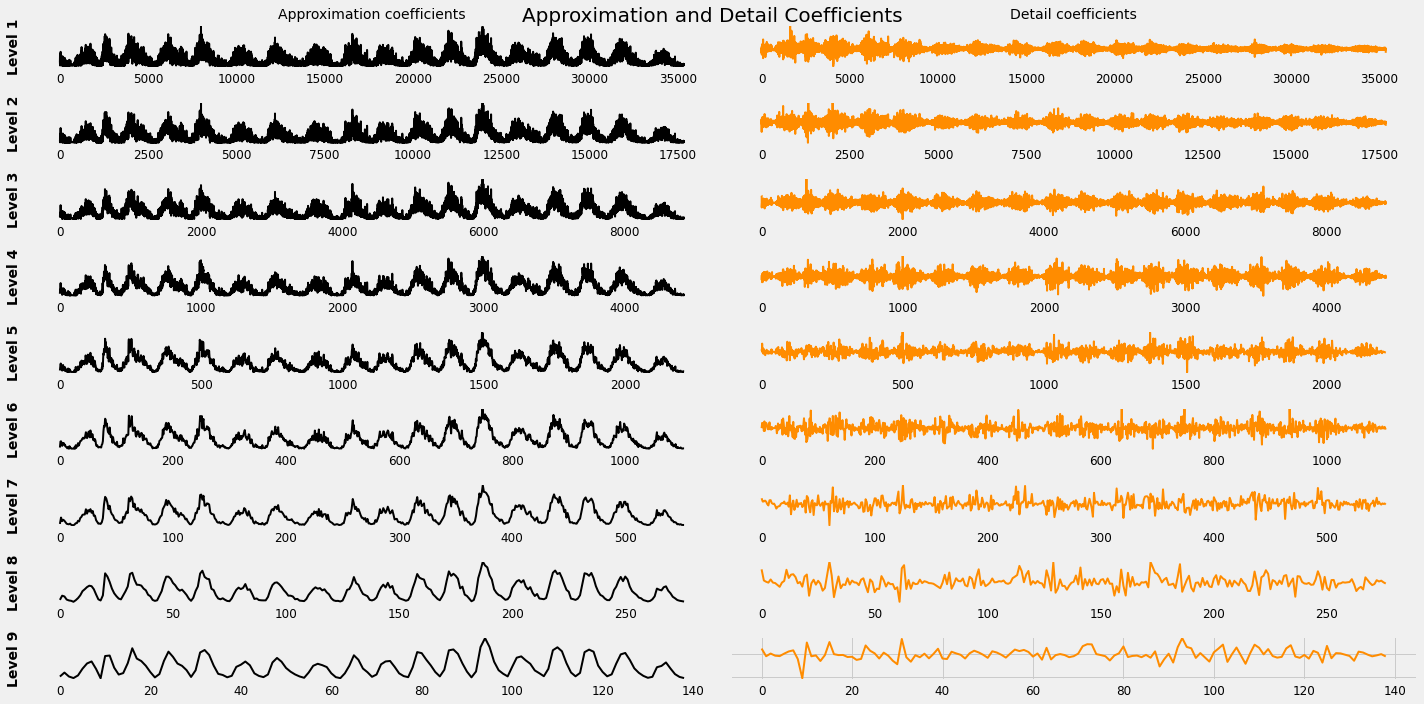

In [17]:
#indices=np.arange(96*10,96*17,1)
#power=2**18
week=data
time=week.Date.max()
sample_rate=1/900.
size= int(sample_rate*time)
t = np.linspace(0, time, num=size)
dataset = np.array(week.Sunspot.tolist())
waveletname = 'sym2'
levels=9
fig, axarr = plt.subplots(nrows=levels, ncols=2, figsize=(20,10))
COEFF_D=[]
DATASET=[]
k=1
for ii in range(levels):
    (dataset, coeff_d) = pywt.dwt(dataset, waveletname,mode='per')
    axarr[ii, 0].plot(dataset, 'k')
    axarr[ii, 1].plot(coeff_d, 'darkorange')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    plt.grid(True)
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
    plt.grid(True)
    #print(len(coeff_d))
    COEFF_D.append(np.repeat(coeff_d,2**k))
    DATASET.append(np.repeat(dataset,2**k))
    k=k+1
plt.tight_layout()
plt.suptitle('Approximation and Detail Coefficients',fontsize=20)
plt.show()

In [18]:
error=DATASET[0]-data.Sunspot

In [19]:
corr=np.corrcoef(error,data.Sunspot)[0][1]

In [20]:
print(' The correlation of the dataset with the error is: ' + str(corr*100)+ '%')

 The correlation of the dataset with the error is: 77.18065241651058%


In [21]:
from sklearn.metrics import mean_squared_error as mse

In [22]:
print ('The RMSE is the ' + str(np.sqrt(mse(error,data.Sunspot))/data.Sunspot.max()*100) + '% of the maximum value')

The RMSE is the 13.757128824106903% of the maximum value


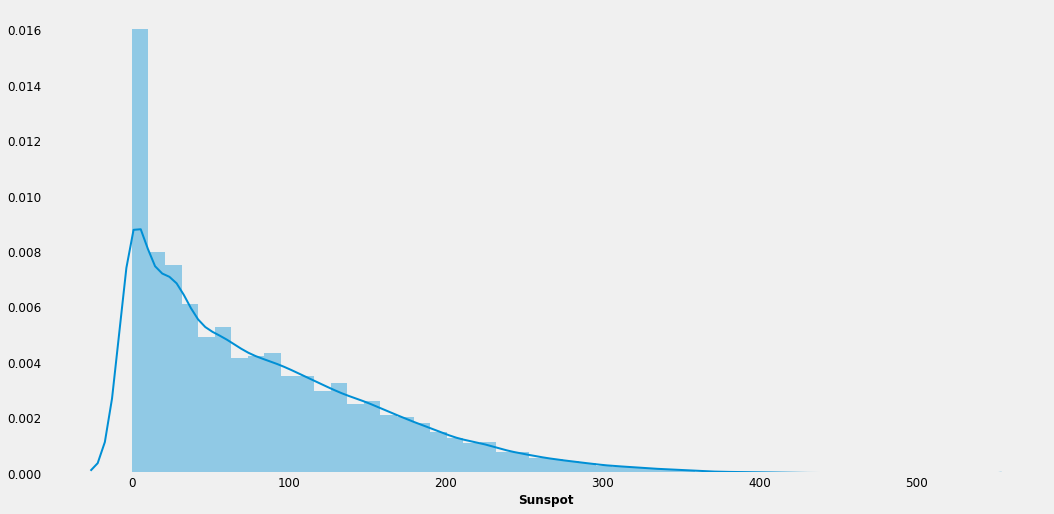

In [23]:
sns.distplot(data.Sunspot)

In [24]:
y=[7.97734322e-03, 7.51935239e-03, 6.11725765e-03,
       4.91737524e-03, 5.28966018e-03, 4.17548366e-03, 4.22637153e-03,
       4.34287797e-03, 3.49787149e-03, 3.52331543e-03, 2.96354886e-03,
       3.25682369e-03, 2.49082733e-03, 2.61536869e-03, 2.09042014e-03,
       2.01676664e-03, 1.81857178e-03, 1.47708739e-03, 1.26416183e-03,
       1.09275005e-03, 1.14497708e-03, 7.74031288e-04, 7.68674670e-04,
       5.37000945e-04, 5.06200392e-04, 4.49955904e-04, 3.56215091e-04,
       2.78544131e-04, 2.41047806e-04, 2.28995416e-04, 1.49985301e-04,
       1.56681074e-04, 1.05793204e-04, 6.16011059e-05, 5.62444880e-05,
       4.95487157e-05, 3.74963254e-05, 2.27656261e-05, 1.60698537e-05,
       1.74090082e-05, 9.37408134e-06, 6.69577239e-06, 4.01746343e-06,
       4.01746343e-06, 5.35661791e-06, 1.33915448e-06, 2.67830895e-06,
       0.000001e+00, 4.01746343e-06]

In [25]:
x=[  10.56,  21.12,  31.68,  42.24,  52.8 ,  63.36,  73.92,
        84.48,  95.04, 105.6 , 116.16, 126.72, 137.28, 147.84, 158.4 ,
       168.96, 179.52, 190.08, 200.64, 211.2 , 221.76, 232.32, 242.88,
       253.44, 264.  , 274.56, 285.12, 295.68, 306.24, 316.8 , 327.36,
       337.92, 348.48, 359.04, 369.6 , 380.16, 390.72, 401.28, 411.84,
       422.4 , 432.96, 443.52, 454.08, 464.64, 475.2 , 485.76, 496.32,
       506.88, 517.44  ]
y=np.array(y)
x=np.log(np.array(x))
x=x.reshape(-1,1)
y=np.log(y)
#y=y.reshape(-1,1)


In [26]:
y=y-y.min()

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(10)
X=poly.fit_transform(x)
reg = LinearRegression().fit(X,y )


In [30]:
reg = LinearRegression().fit(X,y )

reg.score(X,y)


#reg.coef_*X+reg.intercept_

0.9936576753737058

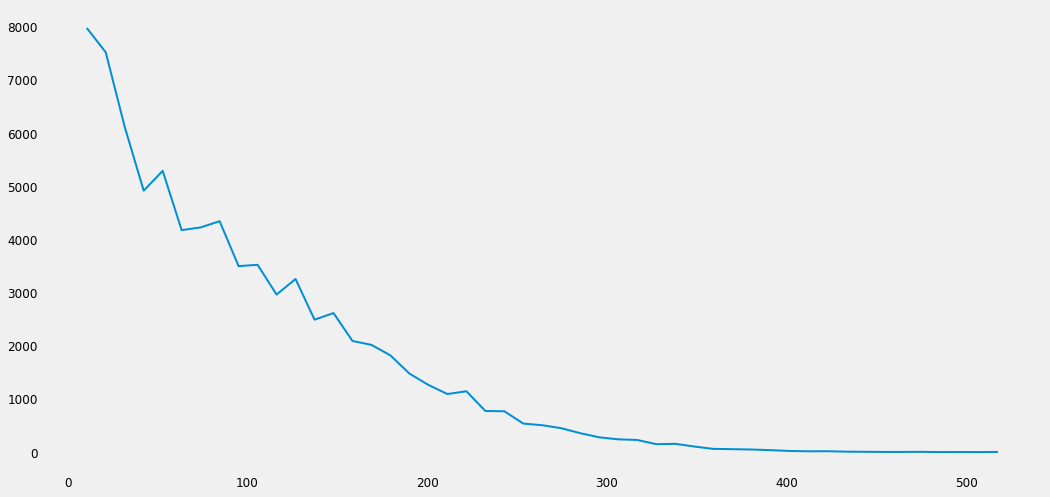

In [31]:
plt.plot(np.exp(x),np.exp(y))


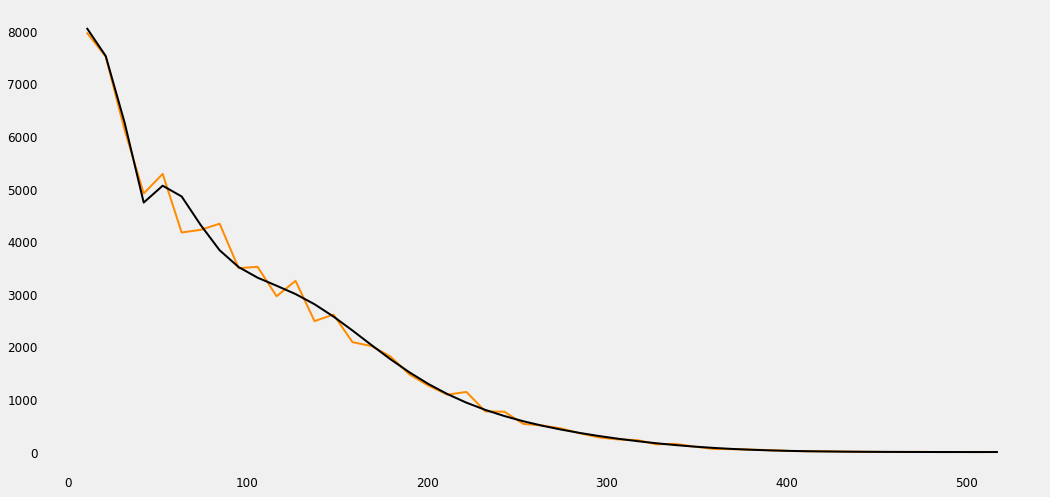

In [32]:
plt.plot(np.exp(x),np.exp(y),color='darkorange')
plt.plot(np.exp(x),np.exp(reg.predict(X)),color='black')
#plt.xlim(0,1.)

# Periodic data:

In [33]:
data=pd.read_csv('/Users/pierohmd/Desktop/year.csv',sep=';',header=None)

FileNotFoundError: [Errno 2] File /Users/pierohmd/Desktop/year.csv does not exist: '/Users/pierohmd/Desktop/year.csv'

Column 1: Gregorian calendar year (mid-year date)
Column 2: Yearly mean total sunspot number.
Column 3: Yearly mean standard deviation of the input sunspot numbers from individual stations.
Column 4: Number of observations used to compute the yearly mean total sunspot number.
Column 5: Definitive/provisional marker. '1' indicates that the value is definitive. '0' indicates that the value is still provisional.

In [354]:
data.tail()

,0,1,2,3,4
315,2015.5,69.8,6.4,8903,1
316,2016.5,39.8,3.9,9940,1
317,2017.5,21.7,2.5,11444,1
318,2018.5,7.0,1.1,12611,1
319,2019.5,3.6,0.5,12884,1


In [355]:
data=data.rename(columns={0:'Year',1:'Sunspot',2:'Sd',3:'N',4:'isprov'})

In [356]:
data=data.drop(data[data['isprov']==0].index)

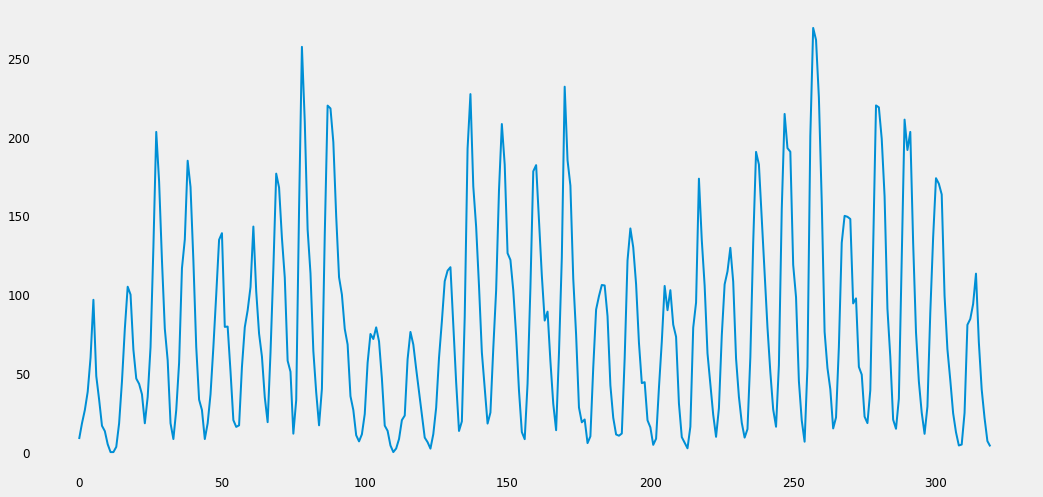

In [357]:
plt.plot(data.Sunspot)

In [358]:
under=np.array(data.Sunspot)
year=np.array(data.Year)
MIN=[]
VALUE=[]
YEAR=[]
for i in range(1,len(under)-1):
    value=under[i]
    if value<under[i-1] and value<=under[i+1]:
        MIN.append(i)
        VALUE.append(value)
        YEAR.append(year[i])

In [359]:
datapoint=pd.DataFrame({'V':VALUE,'M':MIN,'Year':YEAR})

In [360]:
datapoint=datapoint.drop(datapoint[datapoint['V']>40].index)

In [361]:
datapoint=datapoint.drop(datapoint[datapoint['M']==176].index)

In [362]:
year=np.array(datapoint.Year)
V=np.array(datapoint.V)

In [384]:
datapoint['yeardiff']=datapoint.Year.diff()

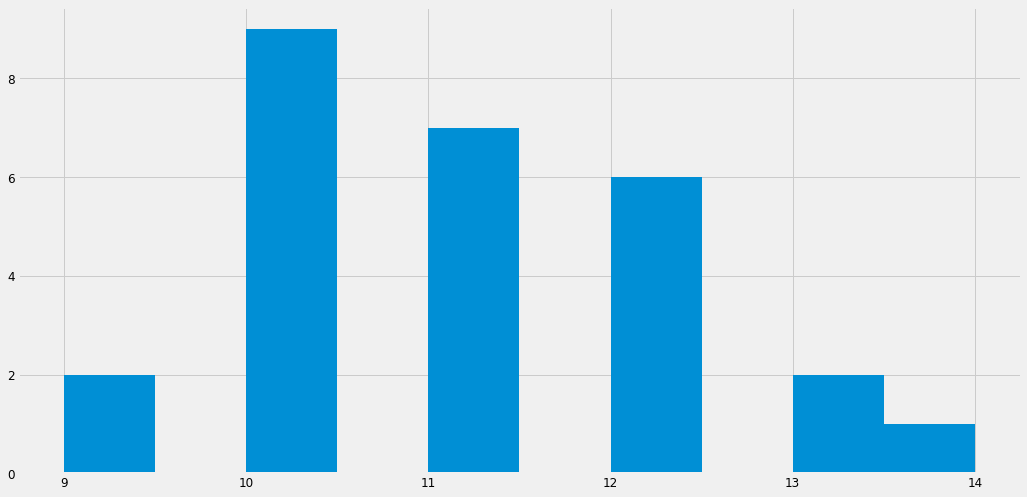

In [385]:
datapoint.yeardiff.hist()

In [427]:
MINV=np.array(datapoint.V)

In [435]:
MAX=[]
MIN=np.array(datapoint.M)

In [436]:
ARGMAX=[]
for m in range(len(MIN)-1):
    MAX.append(under[MIN[m]:MIN[m+1]].max())
    ARGMAX.append(under[MIN[m]:MIN[m+1]].argmax()+MIN[m])

In [437]:
MAX.append(under[MIN[m+1]::].max())
ARGMAX.append(under[MIN[m+1]::].argmax()+MIN[m+1])

In [438]:
MAX=np.array(MAX)
#ARGMAX=np.array(ARGMAX)

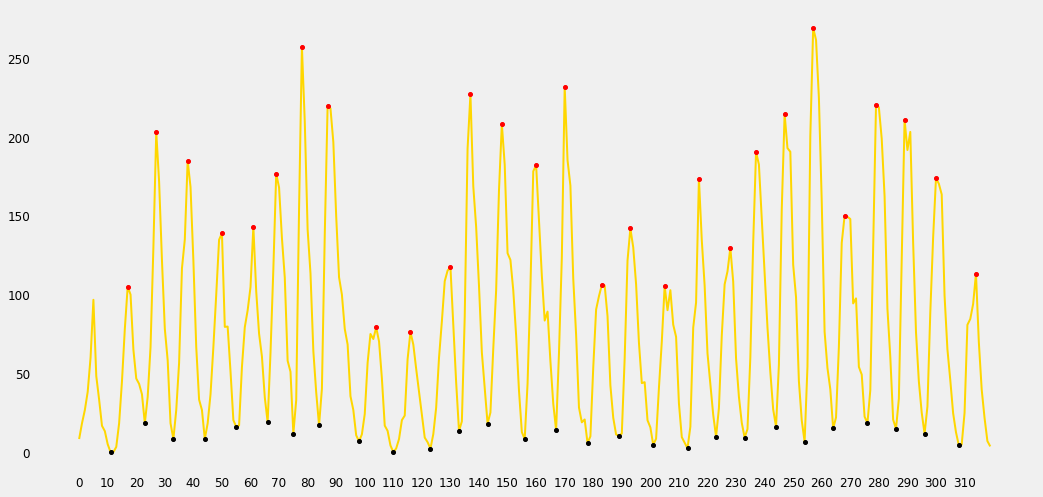

In [440]:
plt.plot(under,color='gold')
plt.xticks(np.arange(0,len(under),10))
plt.plot(ARGMAX,MAX,'.',color='red')
plt.plot(MIN,MINV,'.',color='black')

In [441]:
max_data=pd.DataFrame({'i':ARGMAX,'value':MAX})

# Cycle Exploration

In [1068]:
C_YEAR=datapoint.Year.astype(int).tolist()

In [1074]:
c_data=data.copy()
comp_year=c_data.Year.drop_duplicates().tolist()

In [1075]:
C_YEAR=np.array(C_YEAR)
C_YEAR=C_YEAR[C_YEAR>=comp_year[0]]

In [1076]:
start=np.arange(comp_year[0],C_YEAR[0],1)

In [1077]:
for y in start:
    c_data=c_data.drop(c_data[c_data['Year']==y].index)

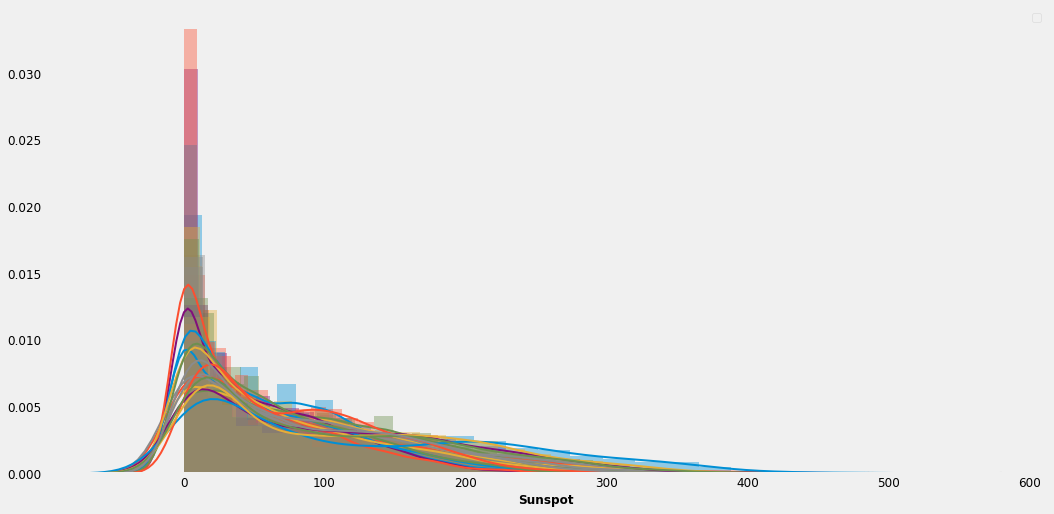

In [1110]:
for y in range(len(C_YEAR)-1):
    cicle=c_data[(c_data['Year']>=C_YEAR[y]) & (c_data['Year']<=C_YEAR[y+1])]
    x=np.histogram(cicle.Sunspot,bins=50)[1][0:50]
    y=np.histogram(cicle.Sunspot,bins=50)[0]
    sns.distplot(cicle.Sunspot)
    plt.legend()

In [1486]:
N_FEAT=np.arange(0,13,1)
RMSE=[]
N=[]
Y_MAX=[]
PRED_N=[]
Y_N=[]
YEAR=[]
COEF_N=[]
for n in N_FEAT:
    PRED=[]
    COEF=[]
    Y=[]
    for j in range(len(C_YEAR)-2):
        cicle=c_data[(c_data['Year']>=C_YEAR[j]) & (c_data['Year']<=C_YEAR[j+1])]
        x=np.histogram(cicle.Sunspot,bins=50)[1][0:50].astype(float)
        y=np.histogram(cicle.Sunspot,bins=50)[0].astype(float)
        y=y+1
        x=x+1
        #y=np.array(y)
        x=np.log(x)
        #print(y)
        x=x.reshape(-1,1)
        y=np.log(y)
        #y=y.reshape(-1,1)
        y=y-y.min()
        poly = PolynomialFeatures(n)
        X=poly.fit_transform(x)
        reg = LinearRegression().fit(X,y )
        pred=reg.predict(X)
        #print(len(pred),len(X))
        PRED.append(np.exp(pred))
        
        coef=[reg.intercept_]
        for c in range(1,len(reg.coef_)):
            coef.append(reg.coef_[c])
        COEF.append(coef)
        RMSE.append(np.sqrt(mse(np.exp(pred),np.exp(y))))
        Y_MAX.append(np.max(np.exp(y)))
        Y.append(np.exp(y))
        N.append(n)
        YEAR.append(C_YEAR[j])
    PRED_N.append(PRED)
    COEF_N.append(COEF)
    Y_N.append(Y)


In [1490]:
res=pd.DataFrame({'RMSE':RMSE,'YEAR':YEAR,'PolynomialFeature':N,'Max':Y_MAX,'Percentage':np.array(RMSE)/np.array(Y_MAX)})


In [1491]:
res.loc[res.RMSE==res.RMSE.min()]

,RMSE,YEAR,PolynomialFeature,Max,Percentage
155,3.848109,1944,9,289.5,0.013292


In [1492]:
res.sort_values(by='RMSE').head()

,RMSE,YEAR,PolynomialFeature,Max,Percentage
155,3.848109,1944,9,289.5,0.013292
171,3.849191,1944,10,289.5,0.013296
187,3.902161,1944,11,289.5,0.013479
203,3.968812,1944,12,289.5,0.013709
173,4.430180,1964,10,219.0,0.020229


In [1493]:
res.sort_values(by='RMSE').tail()

,RMSE,YEAR,PolynomialFeature,Max,Percentage
16,1434.919525,1823,1,803.0,1.786948
23,1765.175039,1901,1,1448.0,1.219044
20,2803.101778,1867,1,1071.0,2.617275
24,3111.518435,1913,1,870.0,3.576458
22,4249.942724,1889,1,1139.0,3.731293


In [1494]:
MEAN_RMSE=[]
for n in N_FEAT:
    MEAN_RMSE.append(res[res['PolynomialFeature']==n].RMSE.mean())

In [1495]:
MEAN_RMSE=np.array(MEAN_RMSE)
min_mod=MEAN_RMSE.argmin()+6
min_rmse=MEAN_RMSE.min()

In [1496]:
print (' The best model on training set is ' + str(min_mod)+' with mean RMSE = '+str(min_rmse))

 The best model on training set is 17 with mean RMSE = 11.74958115231986


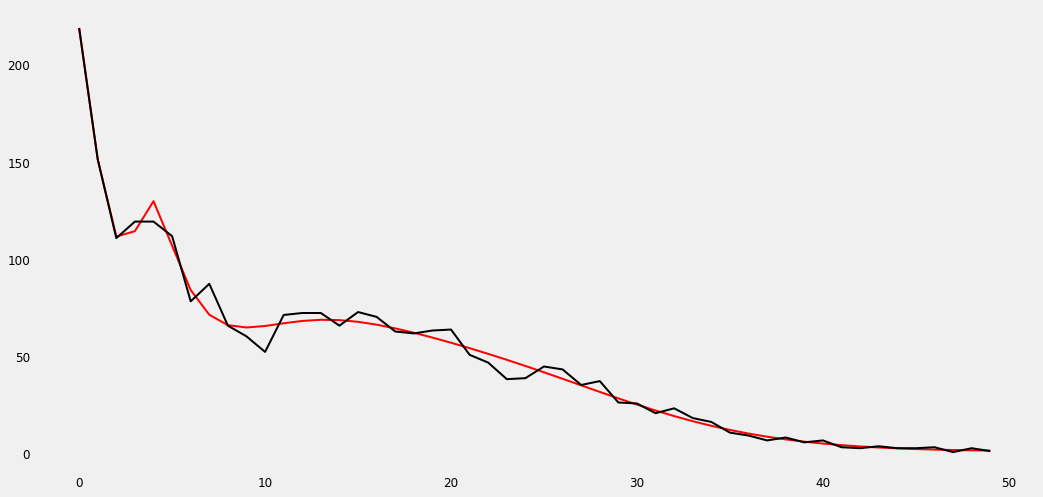

In [1497]:
plt.plot(PRED[len(PRED)-3],color='red')
plt.plot(Y[len(PRED)-3],color='black')

In [1511]:
MODELS=[]
for c in range(len(COEF_N)):
    model=np.zeros(len(COEF_N[c][0]))
    for y in range(len(COEF_N[c])):
        model=model+COEF_N[c][y]
    MODELS.append(model/16)

In [1639]:
def make_prediction(degree):
    x=np.histogram(cicle.Sunspot,bins=50)[1][0:50].astype(float)
    x=np.log(x+1)
    y=np.histogram(cicle.Sunspot,bins=50)[0].astype(float)
    pred=MODELS[degree][0]
    for i in range(1,degree+1):
        pred=pred+x**i*MODELS[degree][i]
    return pred

In [1643]:
cicle=c_data[(c_data['Year']>=C_YEAR[j+1]) & (c_data['Year']<=C_YEAR[j+2])]
x=np.histogram(cicle.Sunspot,bins=50)[1][0:50].astype(float)
x=np.log(x+1)
#x=x+1
y=np.histogram(cicle.Sunspot,bins=50)[0].astype(float)
#plt.plot(np.exp(MODELS[3][0]+x*MODELS[3][1]+x**2*MODELS[3][2]+x**3*MODELS[3][3]))
MSE=[]
for i in range(1,len(MODELS)):
    pred=make_prediction(i)
    #print(pred)
    MSE.append(np.sqrt(mse(pred,np.log(y))))

In [1662]:
PRED=[]
RMSE=[]

cicle=c_data[(c_data['Year']>=C_YEAR[j+1]) & (c_data['Year']<=C_YEAR[j+2])]
x=np.histogram(cicle.Sunspot,bins=50)[1][0:50].astype(float)
y=np.histogram(cicle.Sunspot,bins=50)[0].astype(float)
y=y+1
x=x+1
#y=np.array(y)
x=np.log(x)
#print(y)
x=x.reshape(-1,1)
y=np.log(y)
Y=[]
#y=y.reshape(-1,1
for n in range(1,len(N_FEAT)):
    y=y-y.min()
    poly = PolynomialFeatures(N_FEAT[n])
    pred=make_prediction(N_FEAT[n])
    RMSE.append(np.sqrt(mse(pred,y)))
   # plt.plot(pred)
   # plt.plot(y,color='black')
    PRED.append(pred)
    Y.append(y.max())
        

    

In [1669]:
RMSE=np.array(RMSE)
PERC=RMSE/y.max()

In [1670]:
best_degree=1+RMSE.argmin()

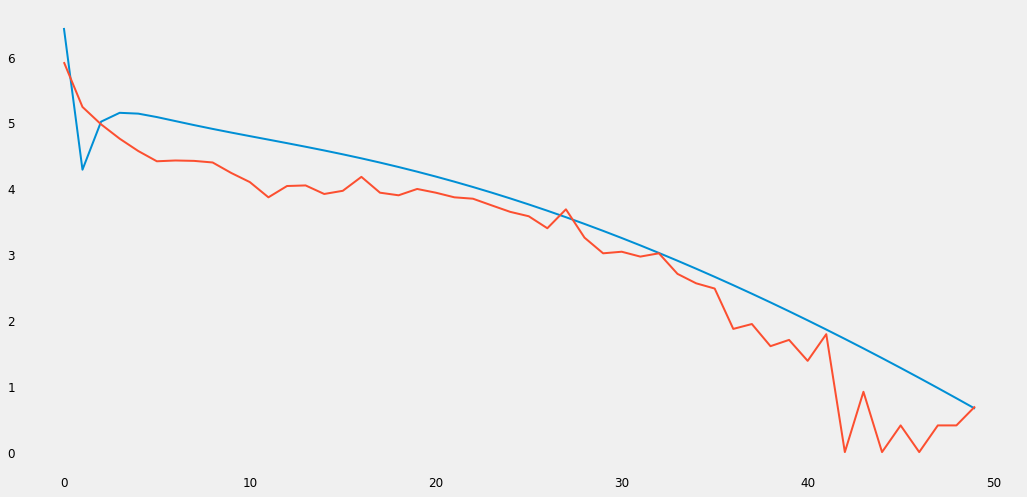

In [1671]:
plt.plot(make_prediction(best_degree))
plt.plot(y)

In [1673]:
PERC[RMSE.argmin()]

0.09851686761149622